# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

## Problem Statement
In the fast-paced taxi booking sector, making the most of revenue is essential for long-term success and driver happiness. Our goal is to use data-driven insights to maximise revenue streams for taxi drivers in order to meet this need. Our research aims to determine whether payment methods have an impact on fare pricing by focusing on the relationship between payment type and fare amount.

## Objective
This project's main goal is to run an A/B test to examine the relationship between the total fare and the method of payment. We use Python hypothesis testing and descriptive statistics to extract useful information that can help taxi drivers generate more cash. In particular, we want to find out if there is a big difference in the fares for those who pay with credit cards versus those who pay with cash.

## Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import joblib

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/taxi_Project/sample_data.csv")

In [ ]:
df.shape

(248575, 18)

In [ ]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,02/18/2020 12:39:21 PM,02/18/2020 01:00:29 PM,1.0,2.50,1.0,N,162,249,1.0,14.5,2.5,0.5,3.55,0.0,0.3,21.35,2.5
1,2.0,01/02/2020 08:01:40 PM,01/02/2020 08:25:05 PM,5.0,5.22,1.0,N,148,230,2.0,20.0,0.5,0.5,0.00,0.0,0.3,23.80,2.5
2,1.0,02/08/2020 12:20:34 AM,02/08/2020 12:35:21 AM,1.0,3.90,1.0,N,170,151,1.0,14.0,3.0,0.5,3.55,0.0,0.3,21.35,2.5
3,1.0,02/08/2020 11:09:13 PM,02/08/2020 11:31:47 PM,1.0,3.40,1.0,N,79,80,1.0,17.0,3.0,0.5,2.75,0.0,0.3,23.55,2.5
4,2.0,02/14/2020 03:09:01 PM,02/14/2020 03:15:58 PM,2.0,1.21,1.0,N,186,249,1.0,6.5,0.0,0.5,0.50,0.0,0.3,10.30,2.5


In [ ]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,248322.000000,248322.000000,248575.000000,248322.000000,248575.00000,248575.000000,248322.000000,248575.000000,248575.000000,248575.000000,248575.000000,248575.000000,248575.000000,248575.000000,248575.000000
mean,1.666582,1.465057,2.733985,1.048449,164.55080,162.244317,1.280092,12.007242,1.073479,0.493374,2.088264,0.266387,0.297480,17.742637,2.268940
std,0.471435,1.108615,3.534763,0.757404,66.13856,70.617625,0.483971,11.073940,1.244917,0.071958,2.607041,1.433122,0.038087,13.389546,0.750117
min,1.000000,0.000000,-4.390000,1.000000,1.00000,1.000000,1.000000,-730.000000,-4.500000,-0.500000,-4.200000,-27.500000,-0.300000,-730.300000,-2.500000
25%,1.000000,1.000000,0.970000,1.000000,125.00000,107.000000,1.000000,6.000000,0.000000,0.500000,0.000000,0.000000,0.300000,11.000000,2.500000
50%,2.000000,1.000000,1.600000,1.000000,162.00000,162.000000,1.000000,9.000000,0.500000,0.500000,1.860000,0.000000,0.300000,14.150000,2.500000
75%,2.000000,1.000000,2.890000,1.000000,234.00000,234.000000,2.000000,13.500000,2.500000,0.500000,2.830000,0.000000,0.300000,19.300000,2.500000
max,2.000000,9.000000,262.880000,99.000000,265.00000,265.000000,4.000000,600.000000,7.000000,0.500000,383.000000,91.000000,0.300000,658.350000,2.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248575 entries, 0 to 248574
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               248322 non-null  float64
 1   tpep_pickup_datetime   248575 non-null  object 
 2   tpep_dropoff_datetime  248575 non-null  object 
 3   passenger_count        248322 non-null  float64
 4   trip_distance          248575 non-null  float64
 5   RatecodeID             248322 non-null  float64
 6   store_and_fwd_flag     248322 non-null  object 
 7   PULocationID           248575 non-null  int64  
 8   DOLocationID           248575 non-null  int64  
 9   payment_type           248322 non-null  float64
 10  fare_amount            248575 non-null  float64
 11  extra                  248575 non-null  float64
 12  mta_tax                248575 non-null  float64
 13  tip_amount             248575 non-null  float64
 14  tolls_amount           248575 non-nu

In [ ]:
df.isna().sum()

VendorID                 253
tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count          253
trip_distance              0
RatecodeID               253
store_and_fwd_flag       253
PULocationID               0
DOLocationID               0
payment_type             253
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
congestion_surcharge       0
dtype: int64

In [ ]:
df[df.duplicated()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge


In [ ]:
df.duplicated().sum()

0

In [ ]:
# passenger count distribution
df['passenger_count'].value_counts(normalize = True)

passenger_count
1.0    0.735464
2.0    0.140539
3.0    0.036110
5.0    0.030863
0.0    0.020457
6.0    0.019773
4.0    0.016777
7.0    0.000008
9.0    0.000004
8.0    0.000004
Name: proportion, dtype: float64

In [ ]:
# payment type distribution
df['payment_type'].value_counts()

payment_type
1.0    181967
2.0     64005
3.0      1502
4.0       848
Name: count, dtype: int64

In [ ]:
# Remove rows where 'payment_type' is 3.0 or 3.5
df = df[~df['payment_type'].isin([3.0, 3.5,4.0])]

# Verify the result
print(df['payment_type'].value_counts())

payment_type
1.0    181967
2.0     64005
Name: count, dtype: int64


In [ ]:
# filtering for payment type 1 and 2
df = df[df['payment_type']<3]

# filtering for passenger count from 1 to 2
df = df[(df['passenger_count']>0)&(df['passenger_count']<6)]

In [ ]:
# replacing the payment type encoded value 1 and 2 to Card and Cash
df['payment_type'].replace([1,2],['Card','Cash'], inplace = True)

<ipython-input-15-ee20a15cbba4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['payment_type'].replace([1,2],['Card','Cash'], inplace = True)


**TYPE CASTING**

In [ ]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

<ipython-input-16-48671b08eba7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [ ]:
df.dtypes

VendorID                        float64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                     object
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

In [ ]:
df['VendorID'] = df['VendorID'].astype(str)
df['passenger_count'] = df['passenger_count'].astype(int)
df['RatecodeID'] = df['RatecodeID'].astype(str)

**REMOVAL OF NULL VALUES**

In [ ]:
print('Missing data %', round(253/df.shape[0]*100, 2))

Missing data % 0.11


In [ ]:
# Drop rows with any missing values in any column
null_values = df.dropna(inplace=True)

# If you want to drop rows only based on specific columns, you can specify them like this:
# df.dropna(subset=['column1', 'column2'], inplace=True)

# Print the shape of the DataFrame after dropping NaN values
print("Shape of DataFrame after dropping NaN values:", df.shape)

Shape of DataFrame after dropping NaN values: (236138, 18)


In [ ]:
df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
dtype: int64

**Drop duplicates**

In [ ]:
# removing duplicate rows as they will not contribute in analysis
df.drop_duplicates(inplace = True)

**OUTLIERS REMOVAL**

In [ ]:
df.drop(columns=['mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge'], inplace=True)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


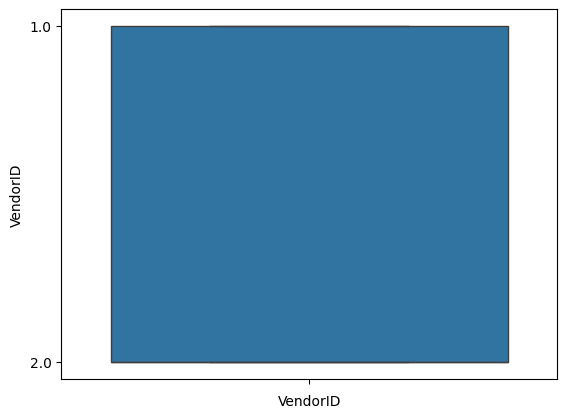

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


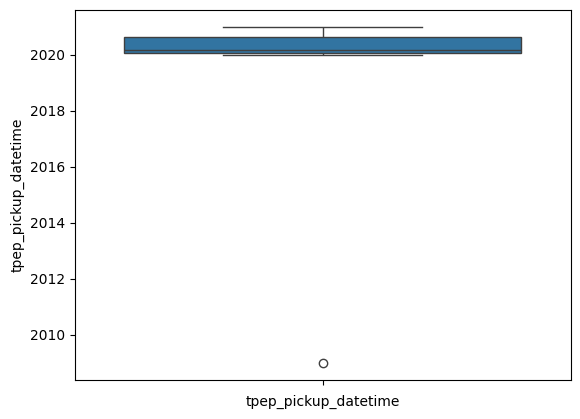

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


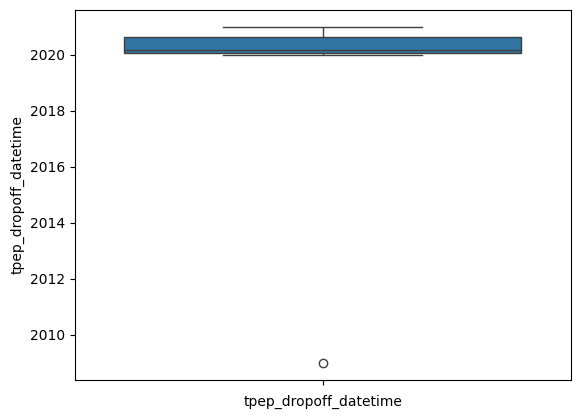

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


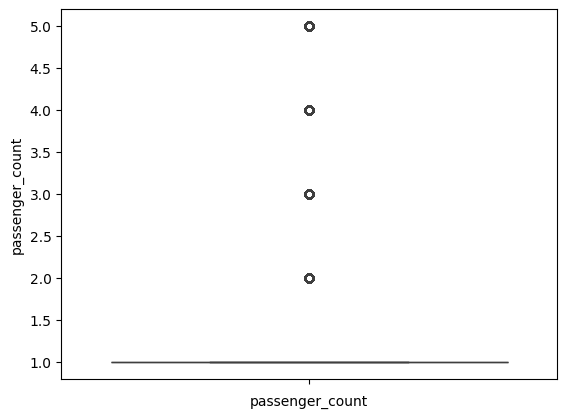

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


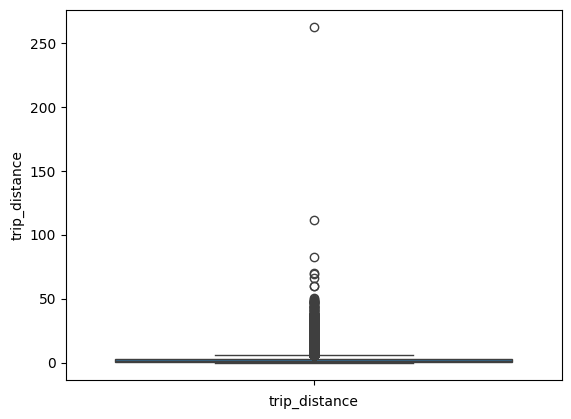

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


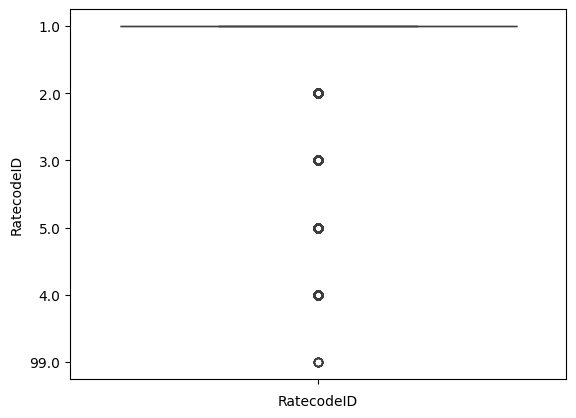

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


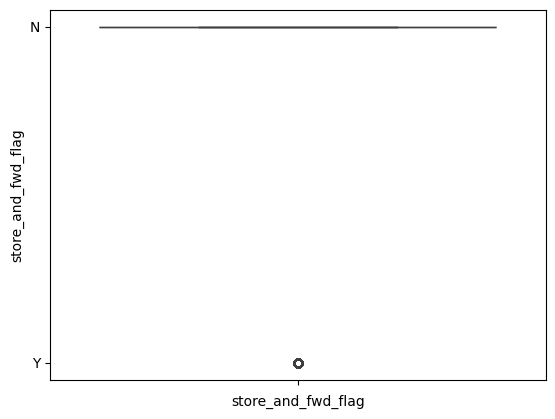

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


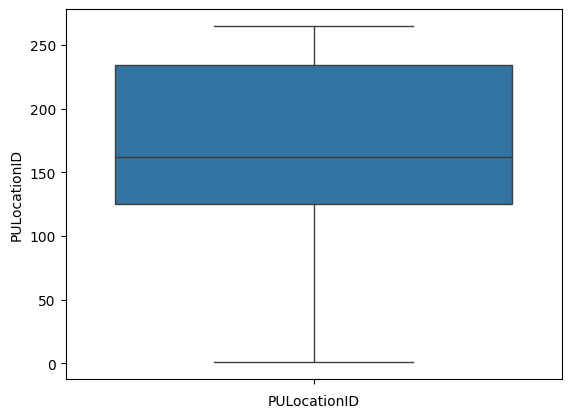

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


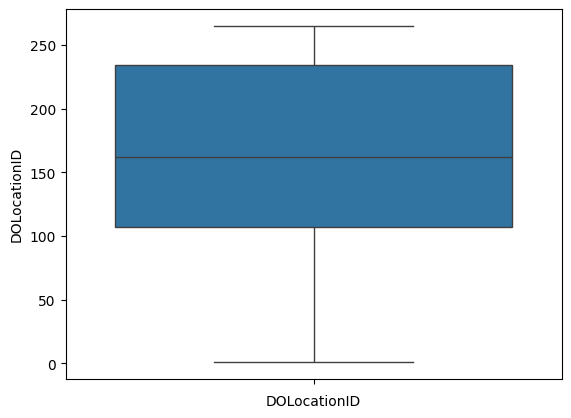

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


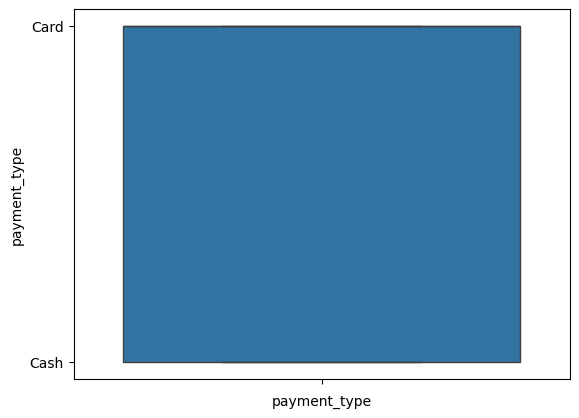

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


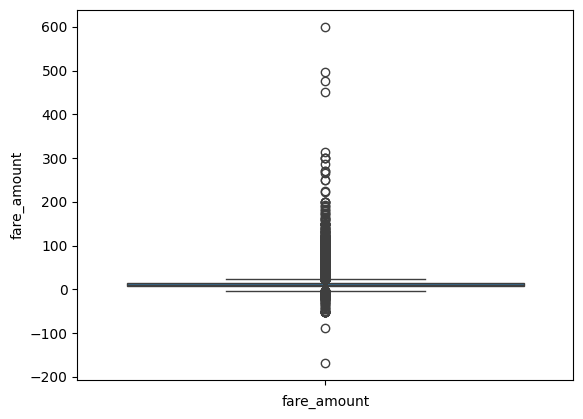

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


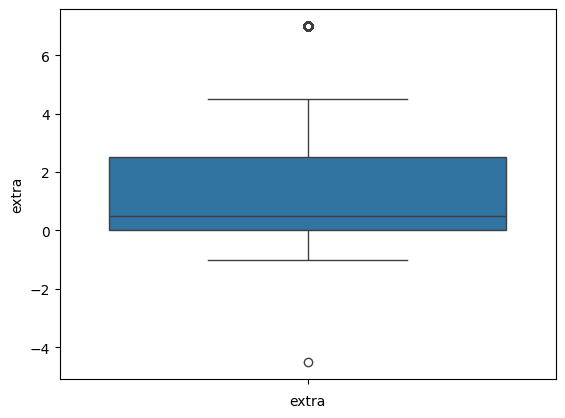

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


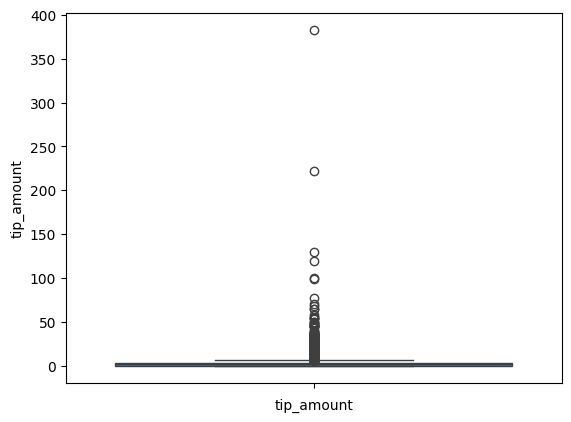

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


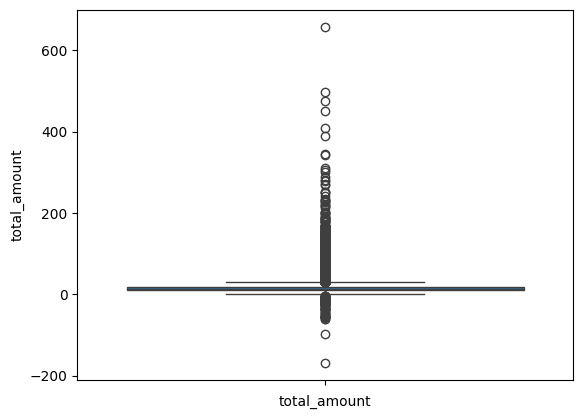

In [ ]:
for i in df:
  sns.boxplot(df[i])
  plt.xlabel(i)
  plt.show()

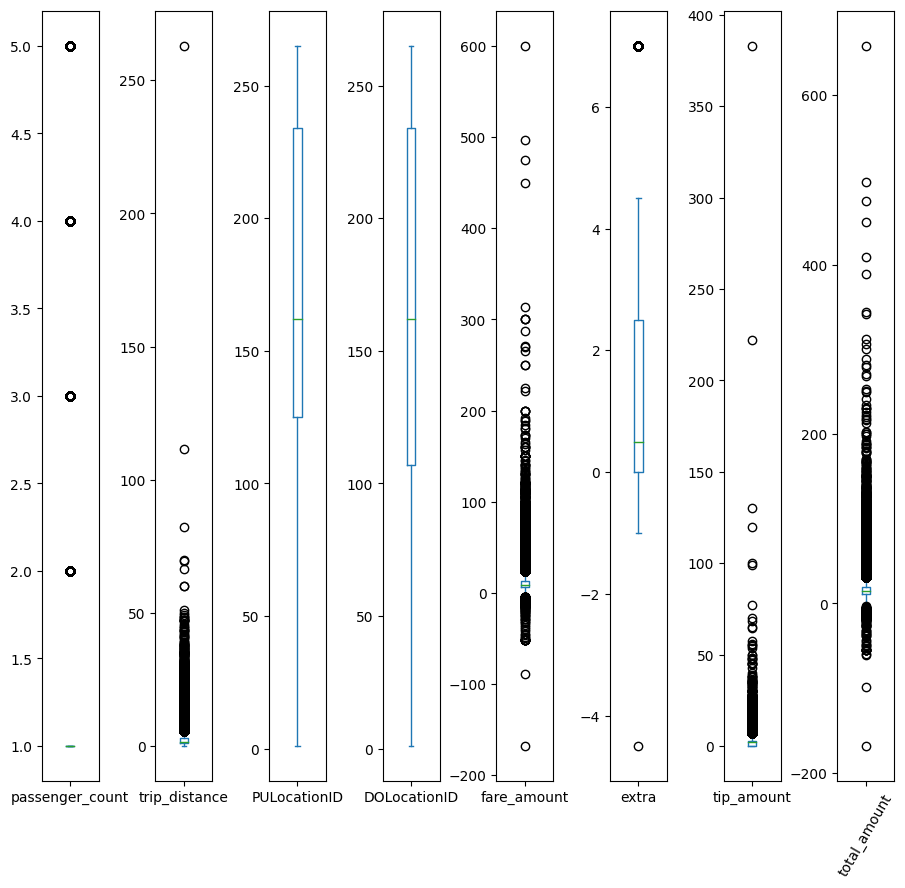

In [ ]:
df.plot(kind= 'box' ,subplots = True ,sharey = False,  figsize=(11,10))
plt.xticks(rotation=60)
plt.subplots_adjust(wspace = True)
plt.show()

In [ ]:
numerical_columns = ['trip_distance','extra','tip_amount','fare_amount','total_amount']

In [ ]:
winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails
                          fold = 1.5,
                          variables = numerical_columns)#rectifying (lower to upper)

winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['trip_distance', 'extra', 'tip_amount', 'fare_amount',
                      'total_amount'])

In [ ]:
df[numerical_columns] = winsor.fit_transform(df[numerical_columns])

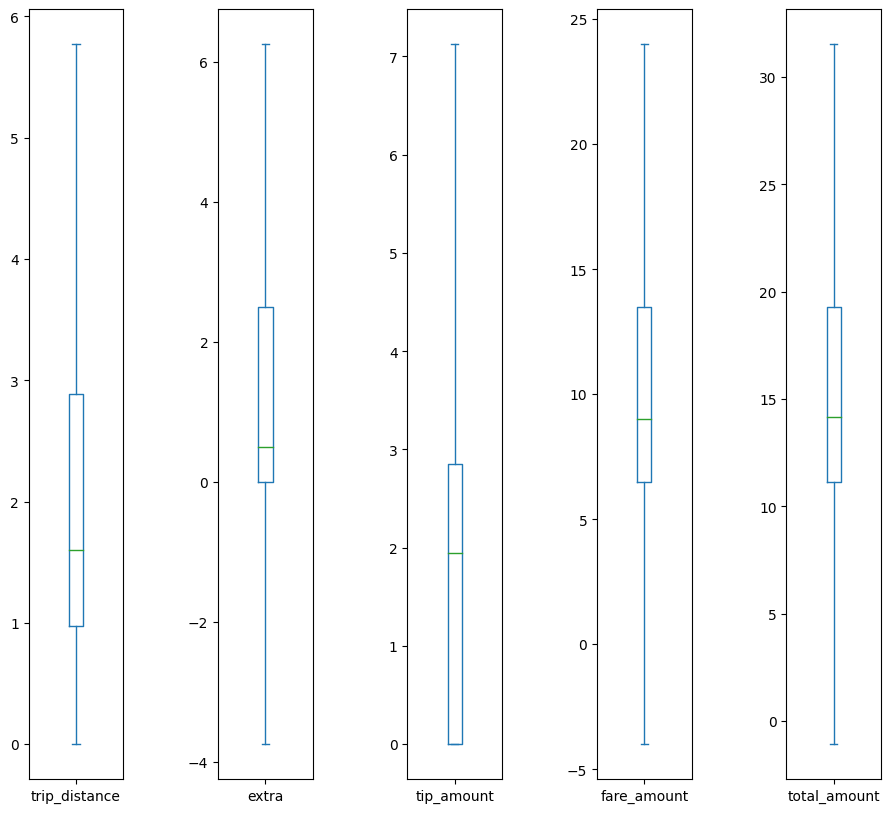

In [ ]:
df[numerical_columns].plot(kind= 'box' ,subplots = True ,sharey = False,  figsize=(11,10))
plt.subplots_adjust(wspace = True)
plt.show()

**FEATURE engine**

In [ ]:
# pickup time duration
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']


#converting to minutes
df['duration'] = df['duration'].dt.total_seconds()/60
df['duration']

0         21.133333
1         23.416667
2         14.783333
3         22.566667
4          6.950000
            ...    
248569     7.683333
248570    10.500000
248571    10.600000
248573     7.983333
248574    12.216667
Name: duration, Length: 236138, dtype: float64

In [ ]:
# filtering the records for only positive values
df = df[df['fare_amount']>0]
df = df[df['trip_distance']>0]
df = df[df['duration']>0]

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


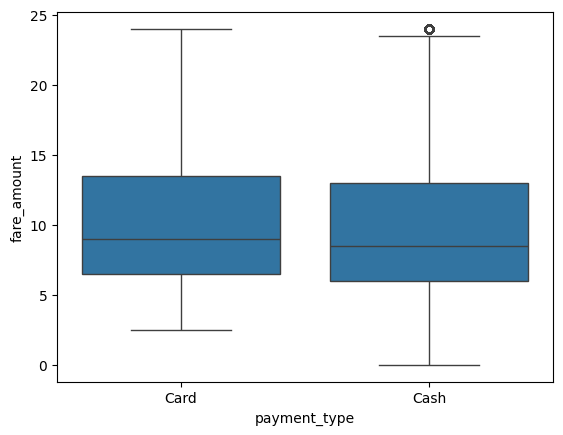

In [ ]:
# check for the outliers
sns.boxplot(data=df, y="fare_amount", x="payment_type")
plt.show()

In [ ]:
# removing outliers using interquartile range for the numerical variables
for col in ['trip_distance','fare_amount','duration']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

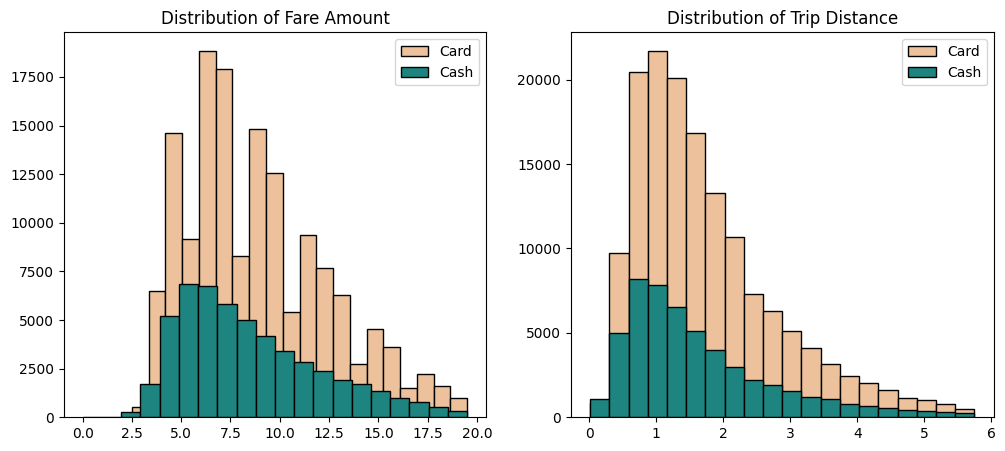

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#ecc19c', label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#1e847f',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#ecc19c',label = 'Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#1e847f',label = 'Cash')
plt.legend()
plt.show()



In [ ]:
# calculating the mean and standard deviation group by on payment type
df.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card            8.882408  3.563757      1.745465  1.068381
Cash            8.463143  3.662911      1.636652  1.113212

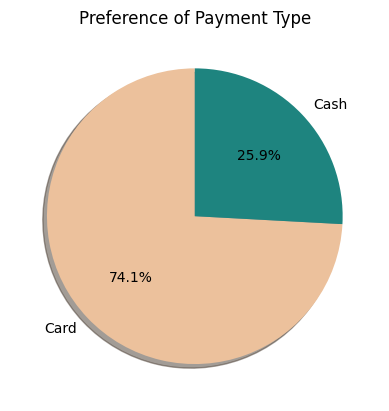

In [ ]:
plt.title('Preference of Payment Type')
plt.pie(df['payment_type'].value_counts(normalize = True), labels = df['payment_type'].value_counts().index,
       startangle = 90,shadow = True, autopct = '%1.1f%%', colors = ['#ecc19c','#1e847f'])
plt.show()

In [ ]:
# calculating the total passenger count distribution based on the different payment type
passenger_count = df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()

In [ ]:
# renaming the passenger_count to count to reset the index
passenger_count.rename(columns = {'passenger_count':'count'},inplace = True)
passenger_count.reset_index(inplace = True)

# calculating the percentage of the each passenger count
passenger_count['perc'] = (passenger_count['count']/passenger_count['count'].sum())*100
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,115021,57.194216
1,Card,2,21259,10.571042
2,Card,3,5530,2.749794
3,Card,4,2459,1.222738
4,Card,5,4840,2.406691
5,Cash,1,39158,19.471324
6,Cash,2,8012,3.983969
7,Cash,3,2109,1.048701
8,Cash,4,1031,0.512665
9,Cash,5,1687,0.838861


In [ ]:
# creating a new empty dataframe to store the distribution of each payment type (useful for the visualization)
df1 = pd.DataFrame(columns = ['payment_type',1,2,3,4,5])

In [ ]:
df1['payment_type'] = ['Card','Cash']
df1.iloc[0,1:] = passenger_count.iloc[:5,-1]
df1.iloc[1,1:] = passenger_count.iloc[5:,-1]

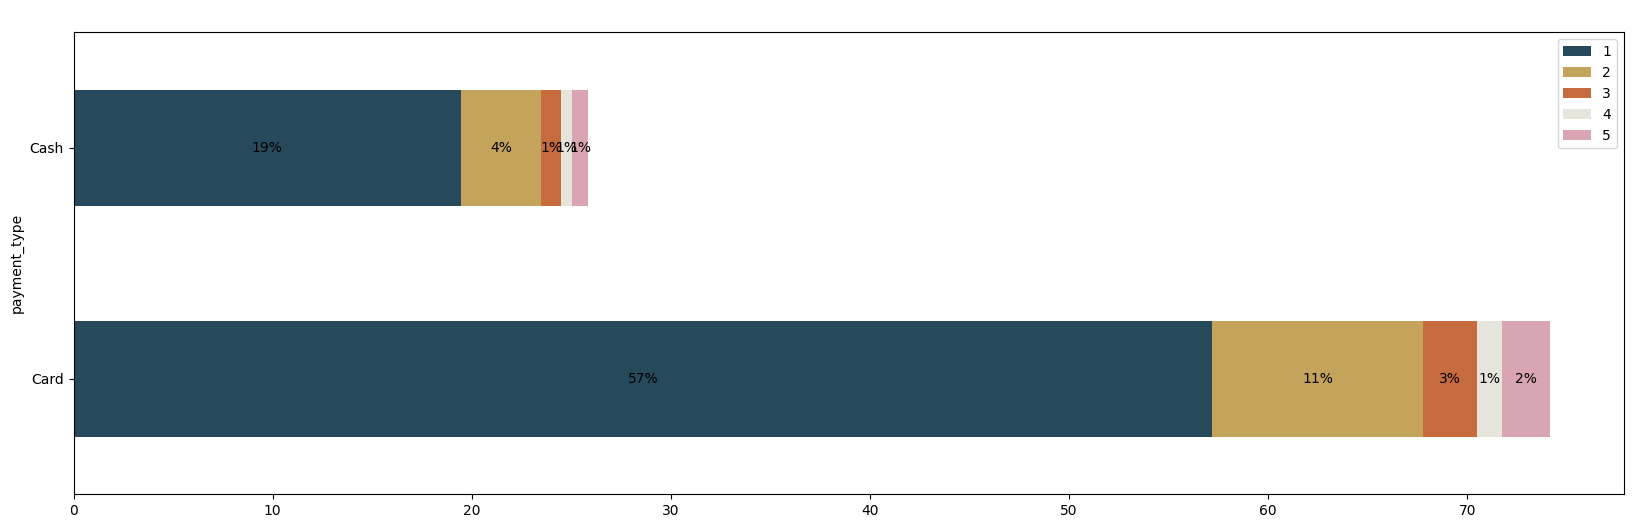

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))
df1.plot(x='payment_type', kind='barh', stacked=True, title=' ', ax=ax, color = ['#26495c', '#c4a35a', '#c66b3d', '#e5e5dc', '#d9a5b3'] )

# Add percentage text+
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2,
            y + height / 2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')

**HYPOTHESIS TESTING**

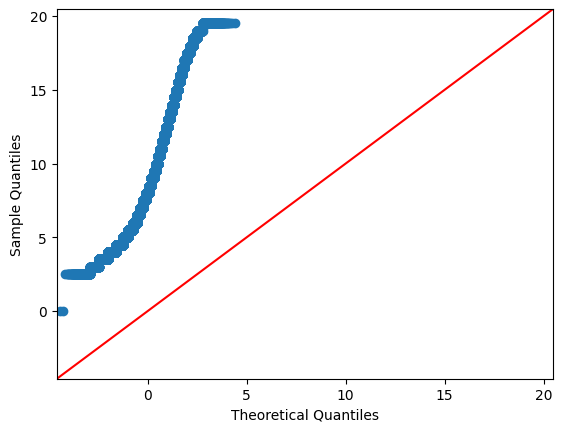

In [ ]:
import statsmodels.api as sm
#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(df['fare_amount'], line='45')
plt.show()

In [ ]:
from scipy import stats
# sample 1
credit_card = df[df['payment_type'] == 'Card']['fare_amount']

# sample 2
cash = df[df['payment_type'] == 'Cash']['fare_amount']

# performing t test on both the different sample
t_stat, p_value = stats.ttest_ind(a=credit_card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 22.63132111549196, P-value: 4.467164090595664e-113


In [ ]:
# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")


Reject the null hypothesis
